<a href="https://colab.research.google.com/github/nastaran-farhadi/Machine-learning-practice/blob/main/regression_Jadifuel_consuption_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import pylab as pl

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/jadi/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.describe()

In [ ]:
cdf=df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


In [ ]:
vis=cdf[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
vis.hist()
plt.show()

In [ ]:
plt.scatter(cdf.CO2EMISSIONS,cdf.CO2EMISSIONS,color="blue")

In [ ]:
import seaborn as sns
sns.lmplot(x="ENGINESIZE",
           y="CO2EMISSIONS",
           height=8,
           aspect=.8,
           fit_reg=False,
           data=cdf,
           hue="CYLINDERS",
           legend=True)

plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")

plt.show()

In [ ]:
msk=np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]
print(train)
type(train)

      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0            2.0          4                   8.5           196
1            2.4          4                   9.6           221
2            1.5          4                   5.9           136
3            3.5          6                  11.1           255
4            3.5          6                  10.6           244
...          ...        ...                   ...           ...
1062         3.0          6                  11.8           271
1063         3.2          6                  11.5           264
1064         3.0          6                  11.8           271
1065         3.2          6                  11.3           260
1066         3.2          6                  12.8           294

[847 rows x 4 columns]


pandas.core.frame.DataFrame

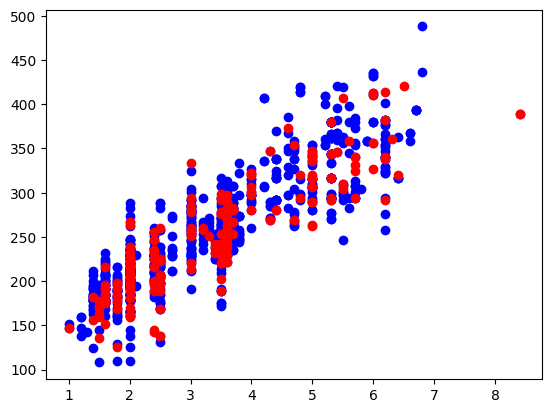

In [ ]:

plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color="blue")
plt.scatter(test.ENGINESIZE,test.CO2EMISSIONS, color="red")

In [ ]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x,train_y)
print('Coefficients:',regr.coef_)
print("Intercept:", regr.intercept_)

Coefficients: [[39.27529828]]
Intercept: [125.54573675]


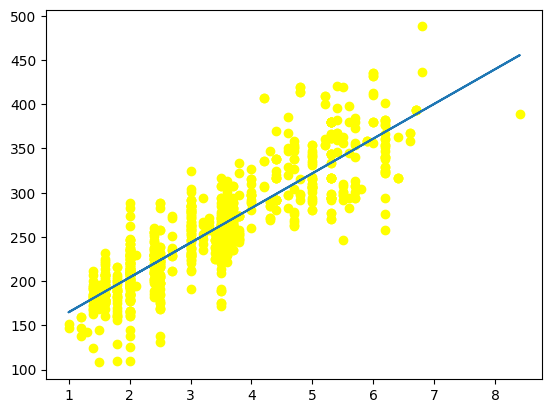

In [ ]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color="yellow")
plt.plot(train_x,regr.coef_[0][0] * train_x + regr.intercept_[0])

In [ ]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[["ENGINESIZE"]])
test_y=np.asanyarray(test[["CO2EMISSIONS"]])
test_y_=regr.predict(test_x)
print("r2_score:" , r2_score(test_y,test_y_))
r2_score(test_y,test_y_)

r2_score: 0.7543992245034002


0.7543992245034002